# Final Project Submission

Please fill out:
* Student name: Lucas Kelly
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Objective:

Create a model that will predict housing prices in King County, WA.

# Process and outline using the OSEMN Model

### Part 1: Obtaining the data

In this section, it is important to be fully aware of the needs and requirements of the stakeholders. Before importing data that has been given or searching for data elsewhere, it is crucial to have a full understanding of what questions need to be answered and who your audience is. 

### Part 2: Scrubing the data

The data scrubbing is also known as preprocessing. In this stage data scientists prepare the data for analysis. This could mean converting data types so they are easier to work with, finding any data points that are missing and determining how to replace them and preparing data by normalization techniques.

### Part 3: Exploring the data

Exploring the data is the part where data scientists get a real feel for the data through asking questions and creating visualizations. Depending on the stakeholders, the questions being asked will vary. In this part of the process, we get an idea of what is really interesting in the data and how that can lead to decision making by the stakeholder or further digging by the data scientist. 

### Part 4: Modeling

Once the data is prepared, understood and cleaned, a multi-regressional analysis takes place. Here, we try to find the most important data values that will create a model that can best predict our target variable. In 

### Part 5: Interpret

What do these numbers mean? Once the model has been created, we can then decide if we have created a model that will accuratly predict the target. Interpreting the results of running our model will help us determine if we need to iterate and rework our model, or if we can move forward with using the model to provide our stakeholders with valuble information. 
_______________________
_______________________

# Part 1: Obtaining the data

### 1.1 Stakeholder requirements

### 1.2 Import necessary libraries

### 1.3 Sourcing the data 

______________

______________

### 1.1 Stakeholder requirements

In [1149]:
# The stakeholders in this situation are real estate investors looking to maximize their profit. The group includes
# landlords who own and rent multiple houses and realators who help the home owners make decisions about buying and 
# selling properties. 

### 1.2 Import necessary libraries

In [1150]:
# Data visualization and mathematical computation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Feature selection
from sklearn.feature_selection import RFE

# Scaling
from sklearn import preprocessing


### 1.3 Sourcing the data

In [1151]:
# First, let's get a general sense of the data we are working with. The data has been provided in the form of a .csv

# Load data
df = pd.read_csv('kc_house_data.csv')

# Part 2: Data Scrubbing

### 2.1 Look at data types and convert where necessary

### 2.2 Look for/detecting missing values (null values)

### 2.3 Clean up and prepare data

### 2.4 Deal with outliers

### 2.5 Look for multicollinearity

______________

______________

### 2.1 Look at data types and convert where necessary

In [1152]:
# Explore the data

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [1153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [1154]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1155]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [1156]:

# We want all our data to be in a numerical form, we will have to deal with both the
# (a) date 
# (b) sqft_basement
# variables as they are listed as objects and will be treated like strings.


### <font color='blue'>2.1a Convert date to datetime</font>

In [1157]:
df.date = pd.to_datetime(df.date)

In [1158]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### <font color='blue'>2.1b Convert sqft_basement to a numeric</font>

In [1159]:
# What makes this variable an object?

df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [1160]:
df['sqft_basement'].value_counts()[:10]

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
Name: sqft_basement, dtype: int64

In [1161]:

# sqft_basement is an object and needs to be converted to a numeric. It contains a
# placeholder were there are no entries, making it an object. There are 454 values with a '?' as a place holder. 


In [1162]:

# Since we have such a high number of houses (12826) with a 0 for sqft_basement, convert any ? placeholder to a 0. 

df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df.sqft_basement = df.sqft_basement.astype('float')

## 2.2 Look for/detecting missing values (null values)

In [1163]:

# Are there any null values or missing values in our data?

df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1164]:

# *Note: data shows missing/null values for the waterfront, view and yr_renovated variables


### <font color='blue'>2.2a waterfront null values</font>

In [1165]:

# How to replace null values for waterfront?


In [1166]:
df.waterfront.dtypes

dtype('float64')

In [1167]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [1168]:
df.waterfront.isna().sum()

2376

In [1169]:
df.waterfront.isna().sum() / 21597

0.11001527989998611

In [1170]:

# Currently the waterfront data is listed as either a 0 or a 1. We have 2376 missing values which is about 11% of
# of our data.


In [1171]:
# I will assume that these missing values are not on the waterfront and will replace missing values with 0. 

df['waterfront'] = np.nan_to_num(df['waterfront'])
df['waterfront'] = df['waterfront'].astype('int')

### <font color='blue'>2.2b view null values</font>

In [1172]:
# look at view values

df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

Text(0, 0.5, 'Count')

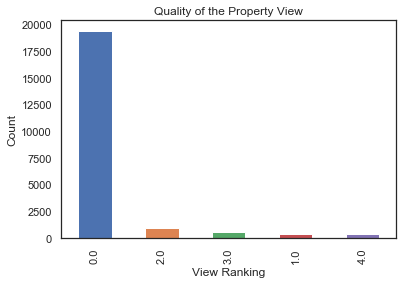

In [1173]:
# What is the distribution of view values?

df['view'].value_counts().plot(kind = 'bar')
plt.title('Quality of the Property View')
plt.xlabel('View Ranking')
plt.ylabel('Count')

In [1174]:
# Given the high count of 0 ranked view properties, it is safe to fill in a 0 for the 63 missing view data points.

df['view'] = np.nan_to_num(df['view'])
df.view = df.view.astype('int')

### <font color='blue'>2.2c yr_renovated null values</font>

In [1175]:
# How many values are missing?

df['yr_renovated'].isna().sum()

3842

In [1176]:
# 3842 is a small number given our total number of houses and though it is important information, we cannot determine
# from our data whether the house was renovated or not. 

# Add in 0's for missing/null values in yr_renovated column

df['yr_renovated'] = np.nan_to_num(df['yr_renovated'])

In [1177]:
# inspecting updated null values

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2.3 Clean up and prepare data

In [1178]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### <font color='blue'>2.3a create columns for sales_yr, yr_built and age</font>

In [1179]:
# It would be helpful to have a column that simply shows how old the home is. To do this, we need to create a few
# different columns. Here I will create a sales year column by taking the year from the date column.
df['sales_yr'] = df['date'].astype(str).str[:4]

# Next, using the new sales_yr columns, I can determine the age of the house when it was sold. 
df['age'] = df['sales_yr'].astype(int) - df['yr_built']

# It will also be helpful to know, if a renovation occured, how recent it's renovation is. 
df['age_rnv'] = 0
df['age_rnv'] = df['sales_yr'][df['yr_renovated']!=0].astype(int)-df['yr_renovated'][df['yr_renovated']!=0]
df['age_rnv'] = np.nan_to_num(df['age_rnv'])
df['age_rnv'] = df['age_rnv'].astype(int)

In [1180]:
df['sales_yr'] = df['sales_yr'].astype(int)

### <font color='blue'>2.3b drop no longer needed columns</font>

In [1181]:
# drop the date, id columns, sales_yr and yr_built columns as they will be redundant in our modeling process

df = df.drop(columns=['date', 'id', 'sales_yr', 'yr_built'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_rnv
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1991.0,98125,47.7210,-122.319,1690,7639,63,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,0.0,98028,47.7379,-122.233,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503,28,0



### <font color='blue'>2.3c the house with 33 bedrooms</font>

In [1182]:
# Looking at the df.describe() data we see that there is one house with 33 bedrooms. This outlier will skew our 
# data and should be removed. 

# Due to the fact that the max number of bedrooms below 33 is 11, 33 seems like a mistake and not an outlier. 
# Given the fact that this row has a sqft_lot of 6000, 1.75 bathrooms and 1 floor, it makes sense to input a more 
# resonable number of bedrooms for this row. 

In [1183]:
np.mean(df.loc[df['floors']==1, ['bedrooms']])

bedrooms    3.162466
dtype: float64

In [1184]:
np.mean(df.loc[df['sqft_living']>5000, ['bedrooms']])

bedrooms    4.658768
dtype: float64

In [1185]:

# Above shows that on average, houses with 1 floor have 3 bedrooms and houses that are greater than 5000 sqft have 
# 4.5 bedrooms.


Text(0, 0.5, 'Count')

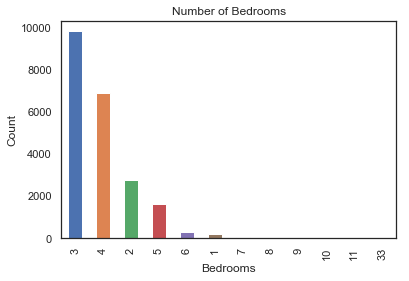

In [1186]:
df['bedrooms'].value_counts().plot(kind = 'bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

In [1187]:
# The most common house sold contains 3 bedrooms.

# replace the 33 bedrooms with 3 bedrooms. 
df.loc[df['bedrooms']==33, 'bedrooms'] = 3

In [1188]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

In [1189]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_rnv
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,43.323286,0.631986
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,29.377285,4.424853
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000,-1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,63.000000,0.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,80.000000


In [1190]:
# check to make sure conversion has taken

df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
age                int64
age_rnv            int64
dtype: object


### <font color='blue'>2.3d check for multicollinearity</font>

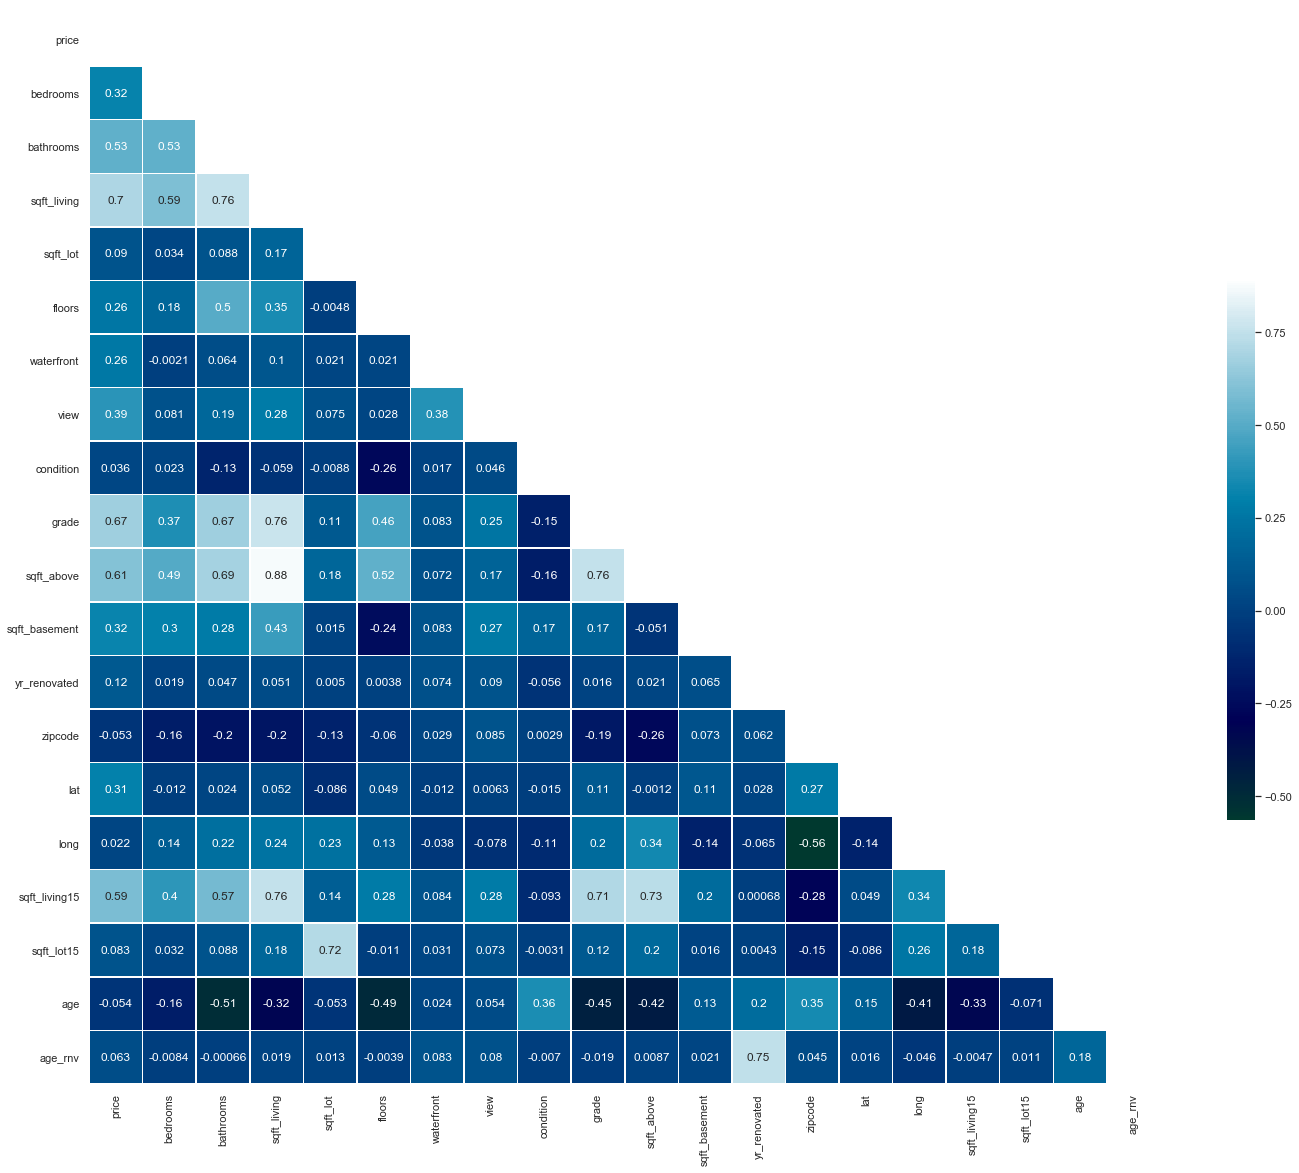

In [1191]:
# create a correlation heat map 
sns.set(style = 'white')
corr = df.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (24, 20))
cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = 'ocean', vmax = .9, center = 0, square = True, annot = True, linewidths = .5, cbar_kws = {'shrink': .5})


In [1192]:
# remove sqft_above


# High correlation (over .75) between:
# sqft_living and bathrooms.
# sqft_living and grade.
# sqft_living and sqft_living15.
# sqft_above and grade.
# age_rnv and yr_rnv.

# drop sqft_living15, sqft_above and yr_rnv.

df = df.drop(columns=['sqft_living15', 'sqft_above', 'yr_renovated'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_lot15,age,age_rnv
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0.0,98178,47.5112,-122.257,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400.0,98125,47.7210,-122.319,7639,63,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0.0,98028,47.7379,-122.233,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910.0,98136,47.5208,-122.393,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0.0,98074,47.6168,-122.045,7503,28,0


# Part 3: Exploratory Analysis
1. Question and explore 
2. Convert categorical data to numeric format through one-hot encoding
3. Normalize numeric data
4. Scale

### <font color = blue>3.1 Question and explore</font>

In [1193]:
# How is price distributed and what features affect price the most?

In [1194]:
df['price'].max()

7700000.0

In [1195]:
df['price'].min()

78000.0

In [1196]:
# We can see that the highest price was a house sold for 7.7 million dollars and the lowest price sold was at 78,000
# dollars. 

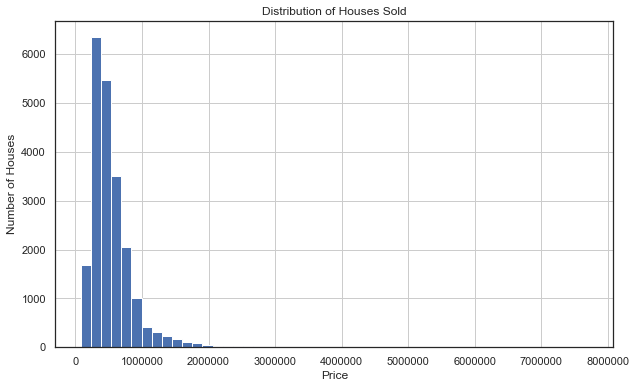

In [1197]:

# We can look at how those prices are distributed among all houses sold. 

plt.figure(figsize=(10,6))
plt.hist(df['price'], 50)
plt.xlabel('Price')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses Sold')
plt.grid(True)
plt.show()


In [1198]:

# The histogram shows that most houses are sold around 500,000 dollars. 


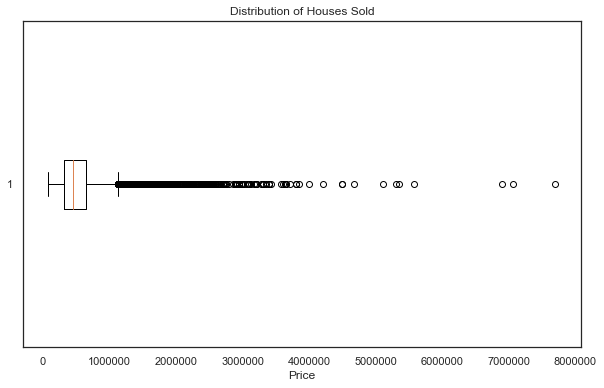

In [1199]:

# A box plot will give us a better look at the outliers. 

plt.figure(figsize=(10,6))
plt.boxplot(df['price'], vert = False)
plt.xlabel('Price')
plt.title('Distribution of Houses Sold')
plt.show()


Text(0.5, 1.0, 'Impact of Number of Bathrooms on Price')

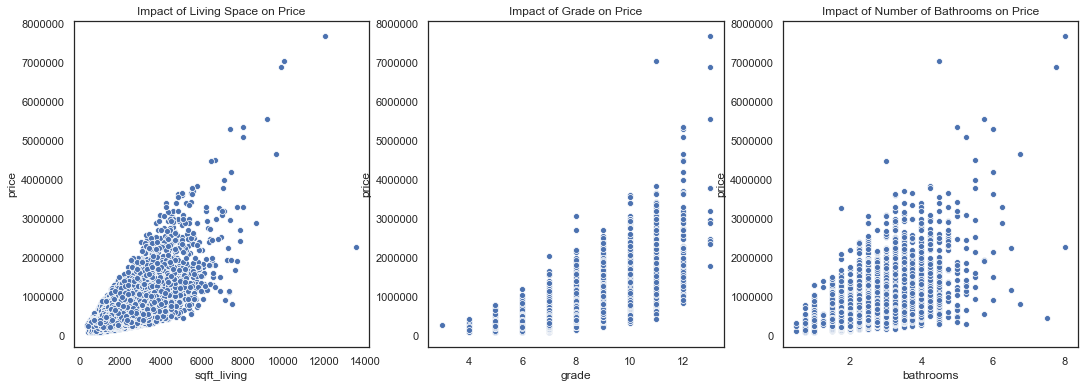

In [1200]:
# What features correlate most closely with our target variable, price?
# Looking at the correlation chart above we can see there are high correlations between price and: 

# 1. sqft_living
# 2. grade
# 3. bathrooms

plt.figure(figsize=(18,6))

plt.subplot(131)
sns.scatterplot(df['sqft_living'], df['price'])
plt.title('Impact of Living Space on Price')

plt.subplot(132)
sns.scatterplot(df['grade'], df['price'])
plt.title('Impact of Grade on Price')

plt.subplot(133)
sns.scatterplot(df['bathrooms'], df['price'])
plt.title('Impact of Number of Bathrooms on Price')


### <font color='blue'>3.1a How much does grade and condition affect price?</font>
<font color='blue'>As a home owner, how much effort should I put into maintenance and care?</font>


/Users/Kelly/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


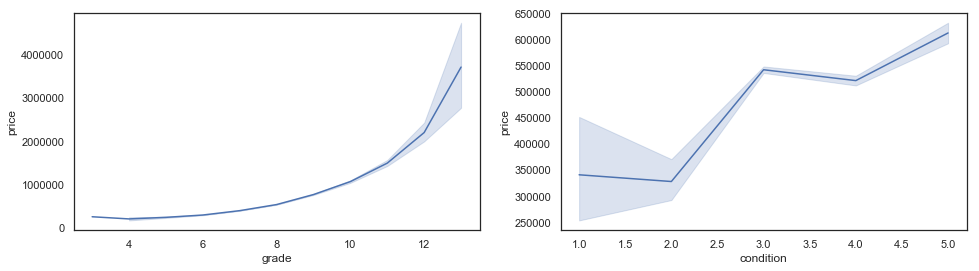

In [1201]:
plt.figure(figsize=(16,4))

plt.subplot(121)
sns.lineplot(df['grade'], df['price'])

plt.subplot(122)
sns.lineplot(df['condition'], df['price'])

In [1202]:
# It is clear that as the grade increases, so does the price. However, significant change does not occur until the
# grade increases from 7 on.

# When looking at condition, there is a big jump from a condition of 2 to a condition of 3, but that tails off 
# between 4 and 4.5. 

# We can generalize that the better the condition and grade of the house and the higher the sales price, but, the
# only the highest grades and highest conditions yield the highest profit. 


Text(0.5, 1.0, 'Impact of Condition on price')

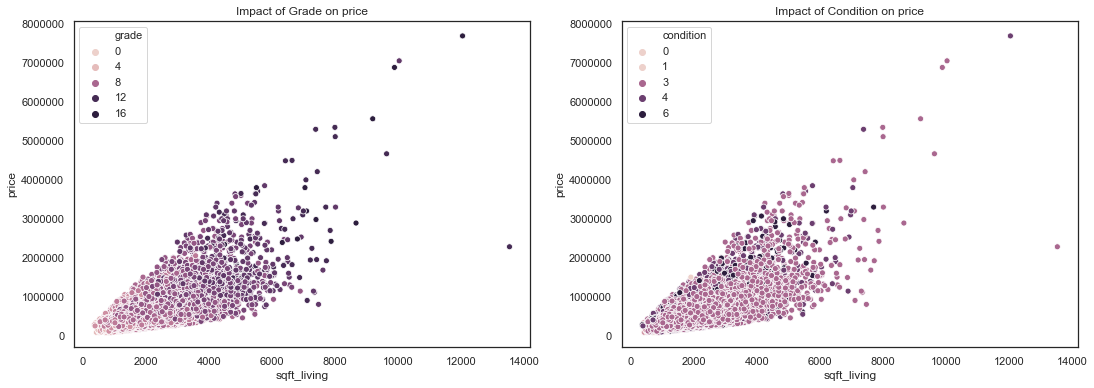

In [1203]:
plt.figure(figsize=(18,6))

plt.subplot(121)
sns.scatterplot(df['sqft_living'], df['price'], hue = df['grade'])
plt.title('Impact of Grade on price')

plt.subplot(122)
sns.scatterplot(df['sqft_living'], df['price'], hue = df['condition'])
plt.title('Impact of Condition on price')

In [1204]:

# The above scatter plots show us that a higher grade is much more likely to increase price as compared to condition.
# For the stakeholder this means having a good knowledge of the specifics of the grading system. 


Text(0.5, 1.0, 'Impact of Grade on Price')

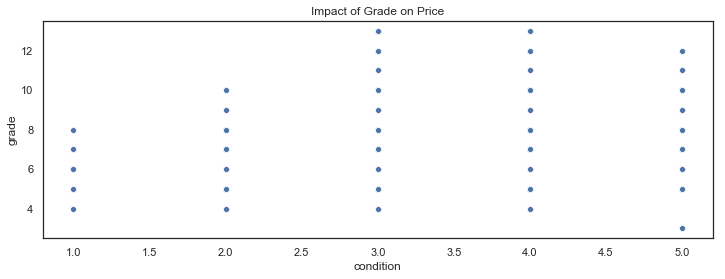

In [1205]:
# Is there any correlation between grade and condition?

plt.figure(figsize = (12, 4))
sns.scatterplot(df['condition'], df['grade'])
plt.title('Impact of Grade on Price')

In [1206]:

# We should see that the low grades are related most closely with low conditions. However, that is not the case. 


### <font color='blue'>3.1b Does the number of bathrooms have a significant influence on price?</font>
<font color='blue'>As real estate investors look to maximize profits, when do they consider adding an extra bathroom?</font>


/Users/Kelly/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


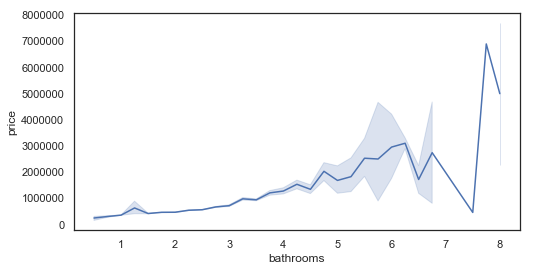

In [1207]:

plt.figure(figsize=(8, 4))

sns.lineplot(df['bathrooms'], df['price'])

In [1208]:

# This visualization could be used to show stakeholders that homes with 3 bathrooms may benefit from an extra
# bathroom being installed.


### <font color='blue'>3.1c Do homes that have been renovated sell at a higher price compared to those that have not been renovated?</font>
<font color='blue'>As a home owner, should I renovate?</font>

In [1209]:
ren = np.mean(df.loc[df['age_rnv'] > 0, ['price']])
ren

price    779445.086567
dtype: float64

In [1210]:
non_ren = np.mean(df.loc[df['age_rnv'] == 0, ['price']])
non_ren

price    532609.860427
dtype: float64

In [1211]:
ren - non_ren

price    246835.22614
dtype: float64

In [1212]:
np.mean(df['age'])

43.323285641524286

In [1213]:

# There is around a 250,000 dollar difference between the average price of renovated and non-renovated houses. Showing
# that homeowners who renovate could yield a higher price. 


### <font color =blue>3.1d What is the difference in average price between waterfront and non-waterfront properties?</font>
<font color='blue'>As a potential home investor, is it worth seeking homes on the waterfront?</font>

In [1214]:
np.mean(df.loc[df['waterfront'] == 0, ['price']])

price    532286.221994
dtype: float64

In [1215]:
np.mean(df.loc[df['waterfront'] == 1, ['price']])

price    1.717215e+06
dtype: float64

### <font color =blue>3.1e Which neighborhoods are showing the highest housing prices and how has that changed over time?</font>
<font color='blue'>As a home owner, which neighborhoods might I look to invest in?</font>

Text(0, 0.5, 'Number of houses sold')

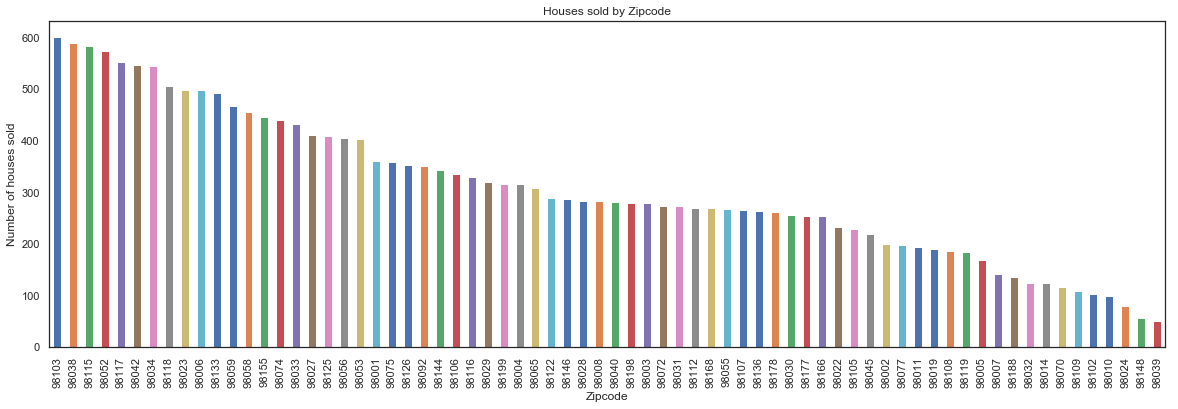

In [1216]:
df['zipcode'].value_counts().plot(kind = 'bar', figsize=(20,6))
plt.title('Houses sold by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Number of houses sold')

In [1217]:

# The bar graph shows that homes in zipcodes 98103, 98038, 98115, 9852 and 98117 have had the most sold homes in the 
# county.

# It also shows that that homes in zipcodes 98039, 98148, 98024, 98010, 98102 have had the sold the least sold homes
# in the county. 

# This information would need further investigation, but could influence where buyers invest or avoid investing in. 


Text(0, 0.5, 'Number of houses sold')

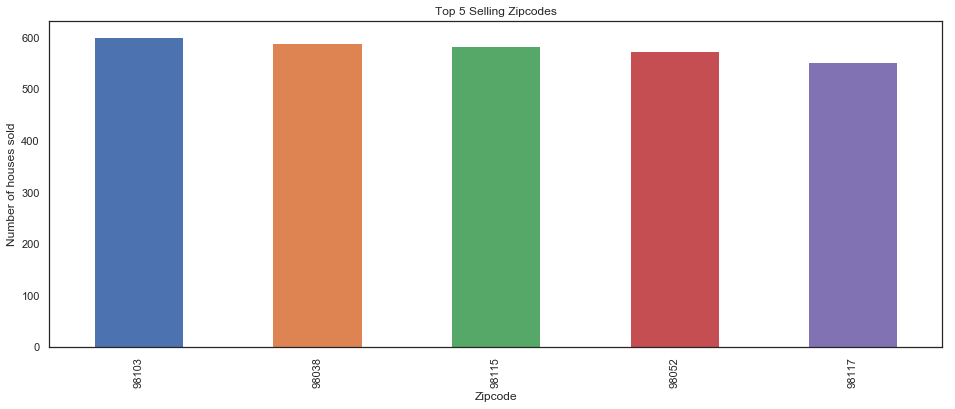

In [1218]:
(df['zipcode'].value_counts().head()).plot(kind = 'bar', figsize=(16,6))
plt.title('Top 5 Selling Zipcodes')
plt.xlabel('Zipcode')
plt.ylabel('Number of houses sold')

Text(0, 0.5, 'Number of houses sold')

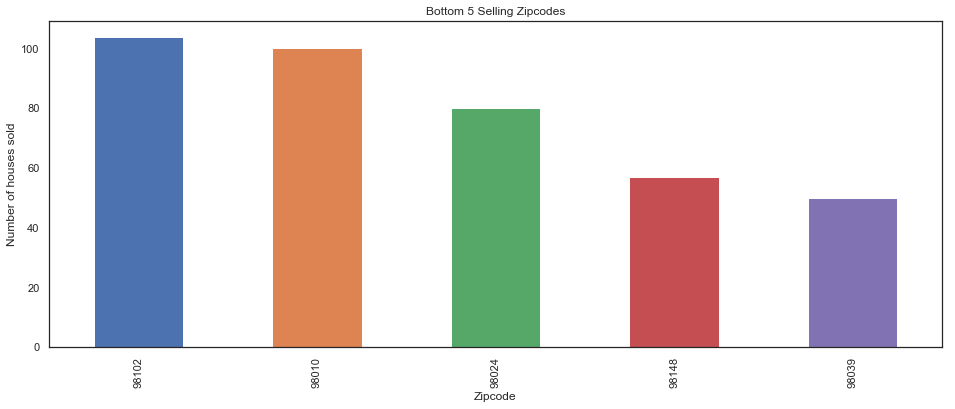

In [1219]:
(df['zipcode'].value_counts().tail()).plot(kind = 'bar', figsize=(16,6))
plt.title('Bottom 5 Selling Zipcodes')
plt.xlabel('Zipcode')
plt.ylabel('Number of houses sold')


## 3.2 Convert categorical data to numeric format through one-hot encoding

In [1220]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_basement    float64
zipcode            int64
lat              float64
long             float64
sqft_lot15         int64
age                int64
age_rnv            int64
dtype: object

In [1221]:
# It makes sense to convert the basement values into non-basement(0) and basement categories(1). 

# bin basement
bins = [ -1 , 1 , df['sqft_basement'].max()]
labels = ['0','1']

df['sqft_basement'] = pd.cut(df['sqft_basement'], bins, labels=labels)
df['sqft_basement'] = df['sqft_basement'].astype('category')
sqft_basement = pd.get_dummies(df['sqft_basement'], prefix='basement', drop_first=True)
df = df.join([sqft_basement])
df.drop(['sqft_basement'], axis=1, inplace=True)

In [1222]:
# create categories
df['bedrooms'] = df['bedrooms'].astype('category')
df['bathrooms'] = df['bathrooms'].astype('int').astype('category')
df['floors'] = df['floors'].astype('int').astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['zipcode'] = df['zipcode'].astype('category')

# create dummies
bedrooms = pd.get_dummies(df['bedrooms'], prefix = 'bedrooms', drop_first = True)
bathrooms = pd.get_dummies(df['bathrooms'], prefix = 'bathrooms', drop_first = True)
floors = pd.get_dummies(df['floors'], prefix = 'floors', drop_first = True)
waterfront = pd.get_dummies(df['waterfront'], prefix = 'waterfront', drop_first = True)
view = pd.get_dummies(df['view'], prefix = 'view', drop_first = True)
condition = pd.get_dummies(df['condition'], prefix = 'condition', drop_first = True)
zipcode = pd.get_dummies(df['zipcode'], prefix = 'zipcode', drop_first = True)

# Adding dummies to the dataset and removing original features
df = df.join([bedrooms, bathrooms, floors, waterfront, view, condition, zipcode])
df.drop(['bedrooms','bathrooms','floors','waterfront','view','condition', 'grade', 'zipcode'], axis=1, inplace=True)

In [1223]:
df.dtypes

price            float64
sqft_living        int64
sqft_lot           int64
lat              float64
long             float64
sqft_lot15         int64
age                int64
age_rnv            int64
basement_1         uint8
bedrooms_2         uint8
bedrooms_3         uint8
bedrooms_4         uint8
bedrooms_5         uint8
bedrooms_6         uint8
bedrooms_7         uint8
bedrooms_8         uint8
bedrooms_9         uint8
bedrooms_10        uint8
bedrooms_11        uint8
bathrooms_1        uint8
bathrooms_2        uint8
bathrooms_3        uint8
bathrooms_4        uint8
bathrooms_5        uint8
bathrooms_6        uint8
bathrooms_7        uint8
bathrooms_8        uint8
floors_2           uint8
floors_3           uint8
waterfront_1       uint8
                  ...   
zipcode_98092      uint8
zipcode_98102      uint8
zipcode_98103      uint8
zipcode_98105      uint8
zipcode_98106      uint8
zipcode_98107      uint8
zipcode_98108      uint8
zipcode_98109      uint8
zipcode_98112      uint8


## 3.3 Normalize

In [1224]:
# log transformations
price = np.log(df['price'])
sqft_living = np.log(df['sqft_living'])
sqft_lot = np.log(df['sqft_lot'])
sqft_lot15 = np.log(df['sqft_lot15'])


## 3.4 Scale

In [1225]:
# Min/Max scaling
df['price'] = (price - min(price)) / (max(price) - min(price))
df['sqft_living'] = (sqft_living - min(sqft_living)) / (max(sqft_living) - min(sqft_living))
df['sqft_lot'] = (sqft_lot - min(sqft_lot)) / (max(sqft_lot) - min(sqft_lot))
df['sqft_lot15'] = (sqft_lot15 - min(sqft_lot15)) / (max(sqft_lot15) - min(sqft_lot15))

In [1226]:
df['age'] = (df['age'] - min(df['age'])) / (max(df['age']) - min(df['age']))
df['age_rnv'] = (df['age_rnv'] - min(df['age_rnv'])) / (max(df['age_rnv']) - min(df['age_rnv']))

In [1227]:
df.head()

,price,sqft_living,sqft_lot,lat,long,sqft_lot15,age,age_rnv,basement_1,bedrooms_2,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.227669,0.322166,0.295858,47.5112,-122.257,0.300162,0.517241,0.012346,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.420522,0.538392,0.326644,47.7210,-122.319,0.342058,0.551724,0.296296,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.182099,0.203585,0.366664,47.7379,-122.233,0.349544,0.715517,0.012346,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.445720,0.463123,0.280700,47.5208,-122.393,0.283185,0.431034,0.012346,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.408883,0.420302,0.340224,47.6168,-122.045,0.339562,0.250000,0.012346,0,0,...,0,0,0,0,0,0,0,0,0,0


# Part 4: Model
1. Create a model that will best predict housing price 
2. Use Recursive Feature Elimination (RFE) to better fit the model using the most imporant features
3. Validate the model using a train-test-split
4. Validate the model using 10 fold cross validation
5. Use the model to predict based prices based on specific predictor values

## 4.1 Create a model


In [1228]:
# split the df into target(Y) and features(X)

Y = df['price']
X = df.drop('price', axis = 1)

In [1229]:
# use sklearn to produce a model

linreg = LinearRegression()
model1 = linreg.fit(X, Y)

In [1230]:
# calculate the accuracy of the model based on the R score

print('R^2 Score:', round(model1.score(X, Y),2))

R^2 Score: 0.86


## 4.2 use RFE to choose the best features for regression analysis

In [1231]:
# use RFE to generate a ranked list of the best features

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 1)

In [1232]:
selector = selector.fit(X, Y)

In [1233]:
# the RFE shows us that sqft_living is the best feature to use in our model

X.columns[selector.support_]

Index(['sqft_living'], dtype='object')

In [1234]:
scale = selector.ranking_

In [1235]:
selected_features = pd.DataFrame({'Column': X.columns, 'Scaled': scale})

In [1236]:
# The top 5 features

selected_features.sort_values(by=['Scaled']).head()

,Column,Scaled
0,sqft_living,1
2,lat,2
60,zipcode_98039,3
28,waterfront_1,4
39,zipcode_98004,5


In [1237]:
# create a for loop that will see how the model's r_squared changes as more features are added to the model

r_squared = []

for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select = x)
    selector.fit(X, Y)
    linreg.fit(X[X.columns[selector.support_]], Y)
    r_sq = linreg.score(X[X.columns[selector.support_]], Y)
    r_squared.append(r_sq)

In [1238]:
# We have 106 features in total

len(X.columns)

106

In [1239]:
# create a for loop that will see how the model's mean_squared_error changes as more features are added to the model

mse = []

for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select = x)
    selector.fit(X, Y)
    linreg.fit(X[X.columns[selector.support_]], Y)
    y_pred = linreg.predict(X[X.columns[selector.support_]])
    mse.append(mean_squared_error(Y, y_pred))

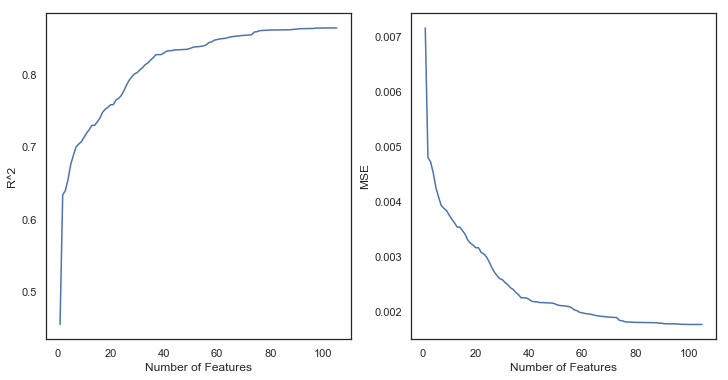

In [1240]:
# create a plot to determine how many features we should include in our model. 

fig = plt.figure(figsize = (12, 6))

ax1 = plt.subplot(121)
ax1.plot(range(1, len(X.columns)), r_squared)
ax1.set_ylabel('R^2')
ax1.set_xlabel('Number of Features');

ax2 = plt.subplot(122)
ax2.plot(range(1, len(X.columns)), mse)
ax2.set_ylabel('MSE')
ax2.set_xlabel('Number of Features');

In [1241]:
# analyzing the above elbow plots we can see that the model begins to overfit just above ~40 features.
# We can use the top 45 features to be sure we are not over fitting. 

selector2 = RFE(linreg, n_features_to_select = 45)
selector2 = selector2.fit(X, np.ravel(Y))
selected_columns = X.columns[selector2.support_]
linreg.fit(X[selected_columns], Y)

# Calculate 
yhat = linreg.predict(X[selected_columns])
SS_Residual = np.sum((Y-yhat)**2)
SS_Total = np.sum((Y-np.mean(Y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)

print('R^2 Score:', r_squared)

print('Adjusted R^2 Score:', adjusted_r_squared)


R^2 Score: 0.8343464451060623
Adjusted R^2 Score: 0.8335293545142168


In [1242]:
# test the accuracy of the model with the top 35 features using an OLS technique

predictors = sm.add_constant(X[selected_columns])
model = sm.OLS(Y, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2412.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:21:18   Log-Likelihood:                 35544.
No. Observations:               21597   AIC:                        -7.100e+04
Df Residuals:                   21551   BIC:                        -7.063e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.8502      0.125    -87.016      0.000     -11.095     -10.606
sqft_living       0.5279      0.003    168.281      0.000       0.522       0.534
sqft_lot          0.1169      0.003     33.696      0.000       0.110       0.124
lat               0.2286      0.003     87.136      0.000       0.223       0.234
bedrooms_8       -0.0468      0.013     -3.586      0.000      -0.072      -0.021
bedrooms_9       -0.0667      0.019     -3.481      0.001      -0.104      -0.029
bedrooms_10      -0.0806      0.027     -2.982      0.003      -0.134      -0.028
bathrooms_6       0.0479      0.014      3.524      0.000       0.021       0.075
bathrooms_8       0.0261      0.033      0.786      0.432      -0.039       0.091
waterfront_1      0.1011      0.005     21.311      0.000       0.092       0.110
view_3            0.0502      0.002     23.386      0.000       0.046       0.054
view_4            0.0813      0.003     24.907      0.000       0.075       0.088
condition_3       0.0411      0.003     12.203      0.000       0.035       0.048
condition_4       0.0393      0.003     11.591      0.000       0.033       0.046
condition_5       0.0518      0.004     14.694      0.000       0.045       0.059
zipcode_98004     0.1858      0.003     68.891      0.000       0.181       0.191
zipcode_98005     0.0936      0.004     25.593      0.000       0.086       0.101
zipcode_98006     0.0928      0.002     42.635      0.000       0.089       0.097
zipcode_98007     0.0717      0.004     18.035      0.000       0.064       0.079
zipcode_98008     0.0652      0.003     23.000      0.000       0.060       0.071
zipcode_98027     0.0616      0.002     26.188      0.000       0.057       0.066
zipcode_98029     0.0820      0.003     30.723      0.000       0.077       0.087
zipcode_98033     0.0886      0.002     37.871      0.000       0.084       0.093
zipcode_98039     0.2358      0.007     35.434      0.000       0.223       0.249
zipcode_98040     0.1498      0.003     52.376      0.000       0.144       0.155
zipcode_98052     0.0537      0.002     26.081      0.000       0.050       0.058
zipcode_98053     0.0414      0.002     17.043      0.000       0.037       0.046
zipcode_98074     0.0552      0.002     23.986      0.000       0.051       0.060
zipcode_98075     0.0700      0.003     27.560      0.000       0.065       0.075
zipcode_98102     0.1551      0.005     33.277      0.000       0.146       0.164
zipcode_98103     0.0994      0.002     48.190      0.000       0.095       0.103
zipcode_98105     0.1323      0.003     41.549      0.000       0.126       0.139
zipcode_98107     0.1093      0.003     36.732      0.000       0.103       0.115
zipcode_98109     0.1555      0.005     34.292      0.000       0.147       0.164
zipcode_98112     0.1711      0.003     58.223   

## 4.3 Validate the model using a train-test-split

In [1243]:
from sklearn.model_selection import train_test_split

predictors_train, predictors_test, Y_train, Y_test = train_test_split(predictors, Y, test_size = 0.2)

In [1244]:
print(len(predictors_train), len(predictors_test), len(Y_train), len(Y_test))

17277 4320 17277 4320


In [1245]:
linreg = LinearRegression()
linreg.fit(predictors_train, Y_train)

Y_hat_train = linreg.predict(predictors_train)
Y_hat_test = linreg.predict(predictors_test)

In [1246]:
train_residuals = Y_hat_train - Y_train
test_residuals = Y_hat_test - Y_test

In [1247]:
mse_train = np.sum((Y_train - Y_hat_train)**2)/len(Y_train)
mse_test = np.sum((Y_test - Y_hat_test)**2)/len(Y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.0021611298601211487
Test Mean Squarred Error: 0.0022533581055846053


## 4.4 Validate using 10 fold cross validation

In [1248]:
from sklearn.model_selection import cross_val_score

cv_10_results = cross_val_score(linreg, predictors, Y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.0021149 , -0.00234231, -0.0022707 , -0.00232582, -0.0021763 ,
       -0.00224778, -0.00225181, -0.00219719, -0.00215579, -0.00208195])

# Part 5: Interpret
1. Communication to stakeholders 
2. Areas in need of further investigation


## 5.1 Communication to stakeholders

In [1249]:
# Zipcode
# sales in zipcode 98039 increase price by 0.2358. This is interesting because zipcode 98039 had the least amount 
# of housing sales. Could this be that those houses are highly sought after and in a great location, making people
# less likely to sell?

# Square Feet of the Living Space
# The sqft_living coefficient of 0.5279 shows the model predicting each square foot of living space to be worth $0.53.

# Bedrooms 8, 9 and 10 all have negative coefficients. This means that increasing the amount of bedrooms in a house 
# from 7 can negatively affect sales.

# Latitude
# Increase lat by 1 will increase price by 0.2286. So, as we move geographically in the county the sales price of the
# will increase, allowing stakeholders to be aware of location and house value.

## 5.2 Areas in need of further invesigtation

In [1250]:
# What is making such low sales in the bottom 5 zip codes occur?

# What is making so many sales in the top 5 zip codes?

# What does my zipcode coefficient mean?

# How does not binning or categorizing latitude and longitude affect my model?

# Why does an increase in bedrooms at the top end have a negative effect on price?